## <center>"Машинное обучение: погружение в Kaggle на борту Титаника" (часть первая)
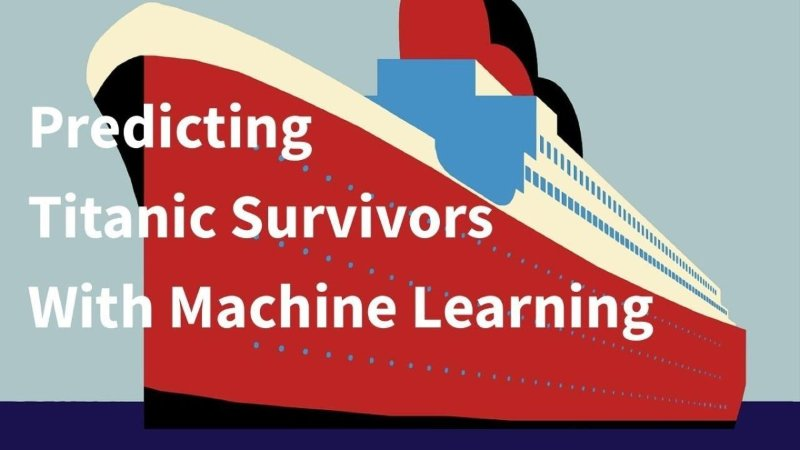

# <center>Titanic : Machine Learning from Disaster - описание задачи

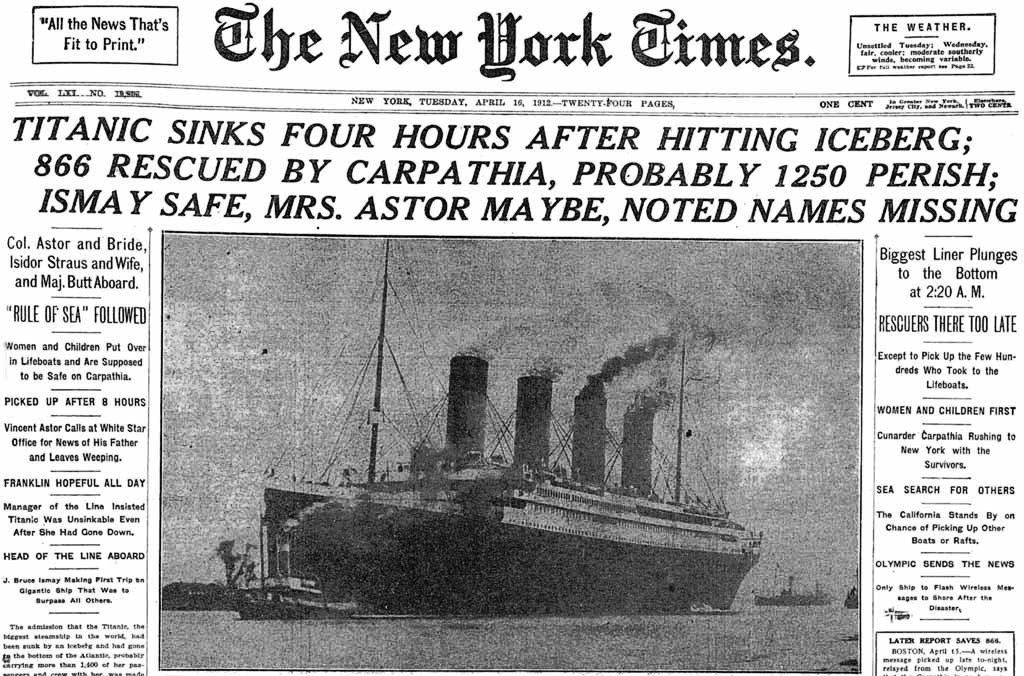

Даны две таблицы (выборки) - тренировочная и тестовая -  с данными о пассажирах Титаника в формате .csv. Каждая строка = признаковое описание одного из пассажиров. Для тестовой выборки нужно предсказать, выжил ли пассажир - целевая переменная (колонка, target) "Survived".



- **train.csv** - данные для обучения модели, содержат колонку "Survived"


- **test.csv** - данные для которых нужно сделать предсказание, колонки с ответом не содержат

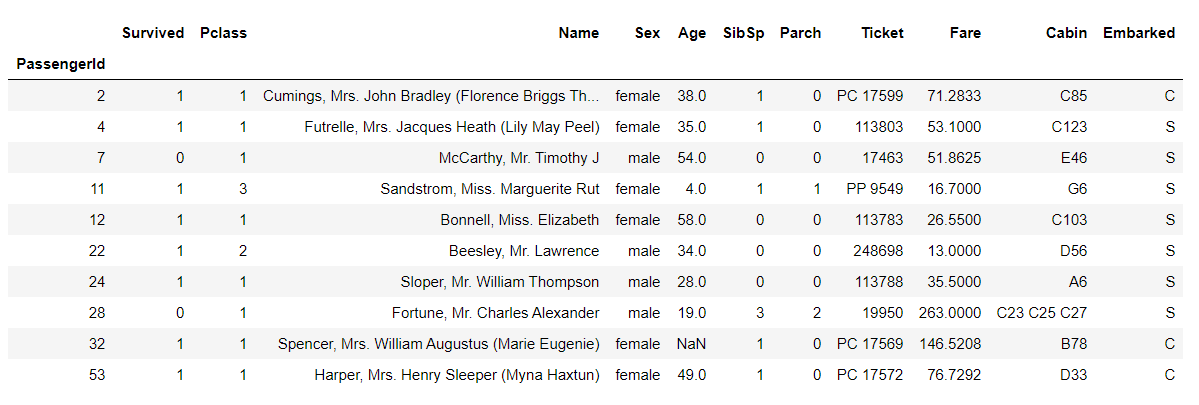


Задача является задачей бинарной классификации, так как для каждого из наблюдений (т.е. для пассажира) нам нужно предсказать, выжил он или нет (для целевой переменной "Survived" существует только два значения: 1 и 0 соответственно).


Задача является задачей обучения с учителем (supervised learning) : для тренировочной выборки у нас есть "ответы"."

**Признаки (колонки, переменные, атрибуты) датасета:**


- **Pclass** - класс, в котором плыл пассажир, passenger class 


- **SibSp** - количество братьев-сестёр/супругов на борту, sibling/spouse


- **Parch** - количество детей/родителей пассажира на борту, parent/children


- **Cabin** - номер каюты 

и т.д.

## Этап 1. Работа с данными

In [114]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

In [115]:
df_train=pd.read_csv('data/train.csv')#тренировочные данные
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_test=pd.read_csv('data/test.csv')#тренировочные данные
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [64]:
#удаление ненужных колонок
user_col = ['Name', 'Cabin', 'Ticket']
df_train = df_train.drop(columns=user_col, errors='ignore')
df_test = df_test.drop(columns=user_col)

In [131]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [70]:
df_train.Age.isnull().sum()

177

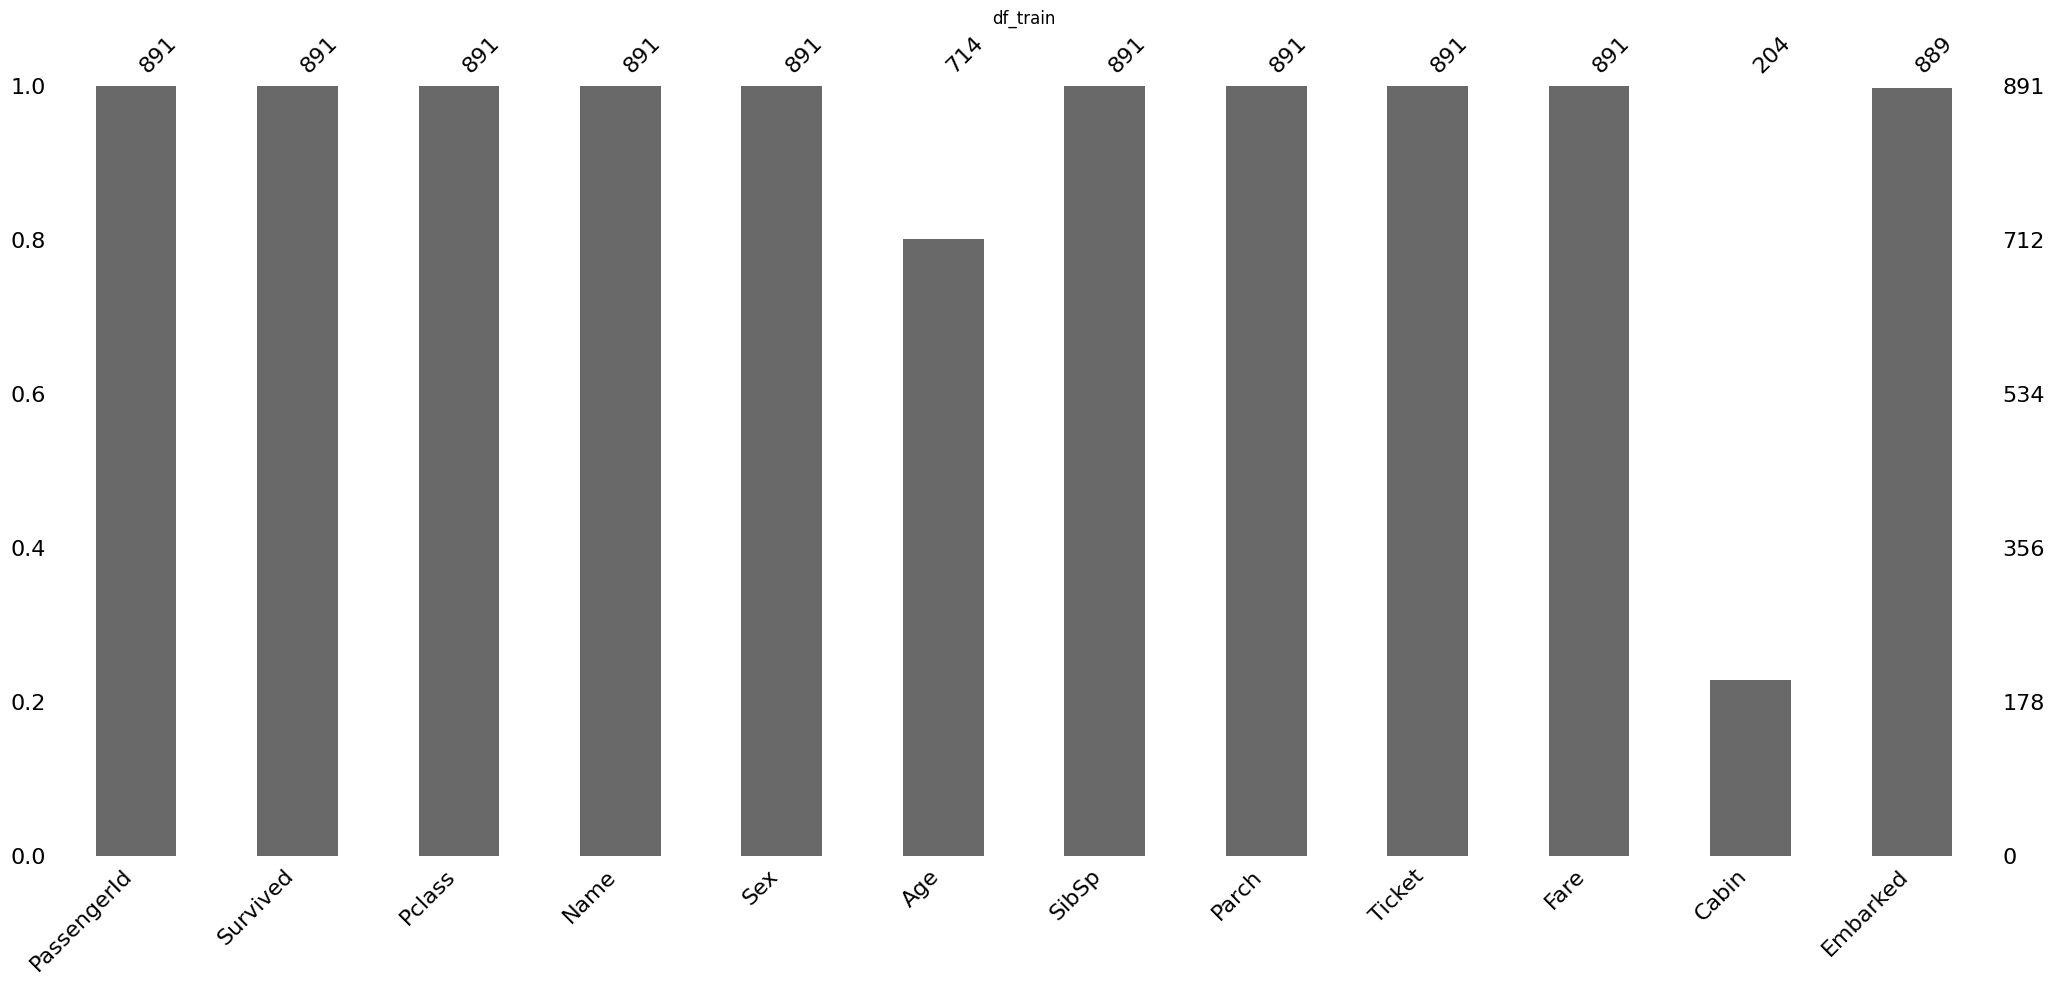

In [126]:
plt.figure(figsize=(5, 2))
msno.bar(df_train)
plt.title('df_train')
plt.show()

In [140]:
missing_values_train = (df_train.isnull().sum() / len(df_train) *100).sort_values(ascending=False)
missing_values

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [141]:
missing_values_test = (df_test.isnull().sum() / len(df_test) *100).sort_values(ascending=False)
missing_values

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

### Заполнение пропусков в данных

In [122]:
df_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [169]:
def impute_date(df):
    df_copy = df.copy()# Копируем DataFrame, чтобы не изменять оригинал
    # Заполняем пропуски для категориальных переменных самым частым значением
    df_copy = df_copy.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col)
    # Заполняем пропуски для количественных переменных медианой
    df_copy = df_copy.apply(lambda col: col.fillna(col.median()) if col.dtype in ['int64','float64'] else col)
    return df_copy

In [170]:
df_train_clean = impute_date(df_train)
df_test_celan = impute_date(df_test)

In [171]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
df_test_celan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


### Визуализация данных

В этом подразделе будет показано, как при помощи всего лишь одного графика можно очень хорошо изучить данные

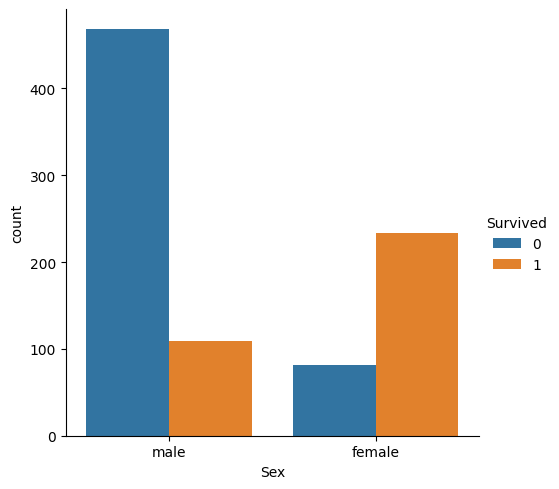

In [183]:
#мужчины умирают гораздо чаще
sns.catplot(x ='Sex', data=df_train_clean, hue='Survived', kind='count');

# Отображение графика
plt.show()

## Примечания
### pclass: показатель социально-экономического статуса.
* 1-й = Верхний
* 2-й = Средний
* 3-й = Нижний

In [198]:
df_train_clean.Pclass.value_counts().sort_index(ascending=True)

1    216
2    184
3    491
Name: Pclass, dtype: int64

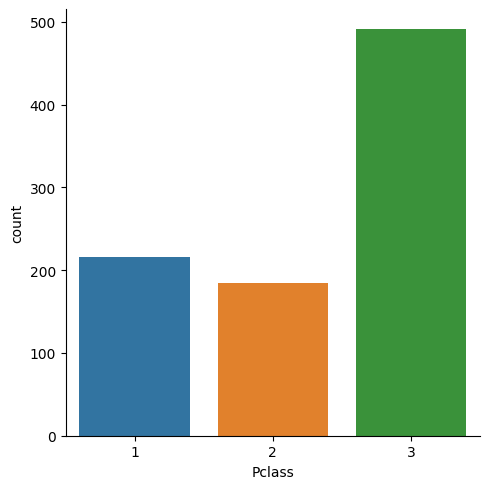

In [195]:
#При этом, бедных было больше всего

sns.catplot(x='Pclass', data=df_train_clean, kind='count');
plt.show()

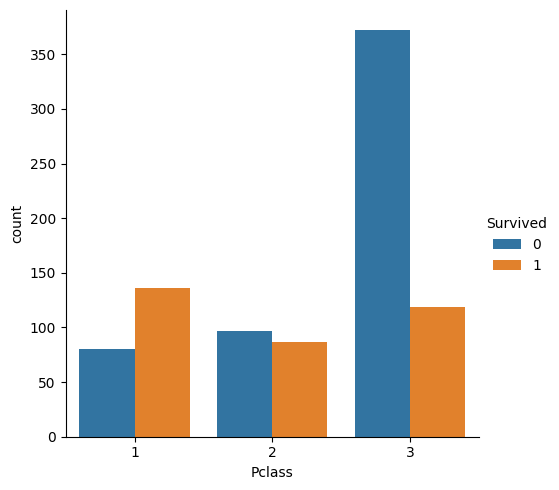

In [189]:
sns.catplot(x='Pclass', data=df_train_clean, hue='Survived', kind='count')
plt.show()

SibSp - количество братьев-сестёр/супругов на борту, sibling/spouse

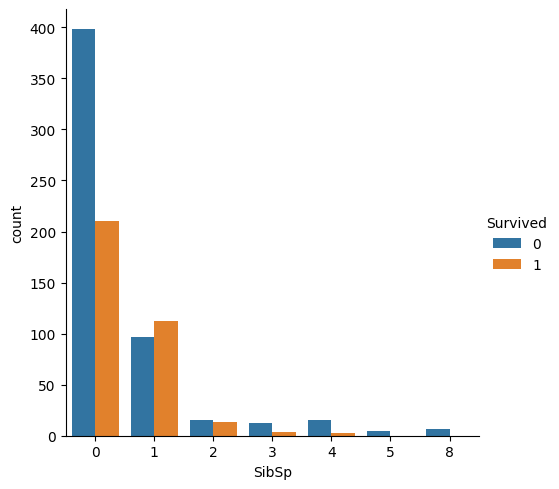

In [203]:
sns.catplot(x="SibSp", data=df_train_clean, hue='Survived',kind="count")
plt.show()